In [1]:
!pip install -U -q byaldi pdf2image qwen-vl-utils transformers
# Tested with byaldi==0.0.4, pdf2image==1.17.0, qwen-vl-utils==0.0.8, transformers==4.45.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.9/517.9 kB 31.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 81.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 58.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 60.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 48.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [2]:
!sudo apt-get install -y poppler-utils

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.8 [186 kB]
Fetched 186 kB in 1s (131 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package poppler-utils.
(Reading database ... 126111 

In [2]:
import os
import shutil

# Map of IKEA item names to their source file names (already in Drive)
pdfs = {
    "ECCO": "ECCO Guidelines on Extraintestinal IBD.pdf"
}

# Replace with your actual drive mount point or folder path
drive_source_dir = "/content/drive/MyDrive/IKEA_PDFs"
output_dir = "data"
os.makedirs(output_dir, exist_ok=True)

# Copy each file from Drive to the local output directory
for name, filename in pdfs.items():
    source_path = os.path.join(drive_source_dir, filename)
    dest_path = os.path.join(output_dir, f"{name}.pdf")

    if os.path.exists(source_path):
        shutil.copy(source_path, dest_path)
        print(f"Copied {name} from {source_path} to {dest_path}")
    else:
        print(f"❌ File not found for {name}: {source_path}")

print("Final files in output folder:", os.listdir(output_dir))

Copied ECCO from /content/drive/MyDrive/IKEA_PDFs/ECCO Guidelines on Extraintestinal IBD.pdf to data/ECCO.pdf
Final files in output folder: ['ECCO.pdf']


In [3]:
import os
from pdf2image import convert_from_path


def convert_pdfs_to_images(pdf_folder):
    pdf_files = [f for f in os.listdir(pdf_folder) if f.endswith(".pdf")]
    all_images = {}

    for doc_id, pdf_file in enumerate(pdf_files):
        pdf_path = os.path.join(pdf_folder, pdf_file)
        images = convert_from_path(pdf_path)
        all_images[doc_id] = images

    return all_images


all_images = convert_pdfs_to_images("/content/data/")

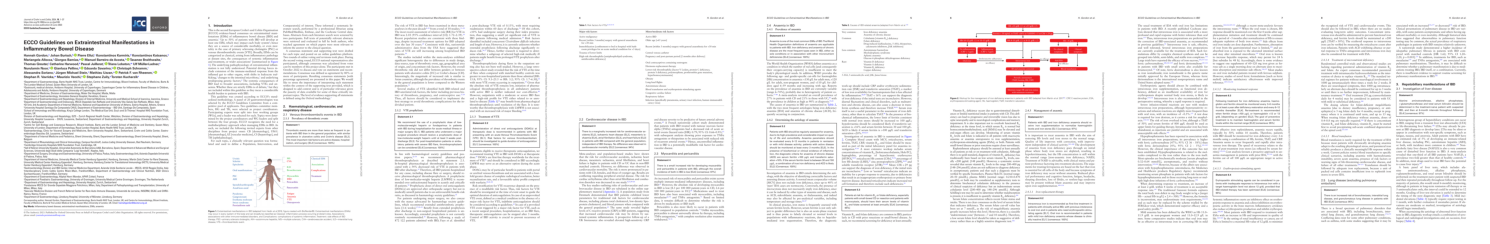

In [4]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 8, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = all_images[0][i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [5]:
import torch
print("PyTorch CUDA available:", torch.cuda.is_available())
print("Device name:", torch.cuda.get_device_name(0) if torch.cuda.is_available() else "CPU")

PyTorch CUDA available: True
Device name: Tesla T4


In [6]:
from byaldi import RAGMultiModalModel

docs_retrieval_model = RAGMultiModalModel.from_pretrained("vidore/colpali-v1.2")

Verbosity is set to 1 (active). Pass verbose=0 to make quieter.


Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

Using a slow image processor as `use_fast` is unset and a slow processor was saved with this model. `use_fast=True` will be the default behavior in v4.52, even if the model was saved with a slow processor. This will result in minor differences in outputs. You'll still be able to use a slow processor with `use_fast=False`.


In [7]:
docs_retrieval_model.index(
    input_path="data/", index_name="image_index", store_collection_with_index=False, overwrite=True
)

overwrite is on. Deleting existing index image_index to build a new one.
Indexing file: data/ECCO.pdf
Added page 1 of document 0 to index.
Added page 2 of document 0 to index.
Added page 3 of document 0 to index.
Added page 4 of document 0 to index.
Added page 5 of document 0 to index.
Added page 6 of document 0 to index.
Added page 7 of document 0 to index.
Added page 8 of document 0 to index.
Added page 9 of document 0 to index.
Added page 10 of document 0 to index.
Added page 11 of document 0 to index.
Added page 12 of document 0 to index.
Added page 13 of document 0 to index.
Added page 14 of document 0 to index.
Added page 15 of document 0 to index.
Added page 16 of document 0 to index.
Added page 17 of document 0 to index.
Added page 18 of document 0 to index.
Added page 19 of document 0 to index.
Added page 20 of document 0 to index.
Added page 21 of document 0 to index.
Added page 22 of document 0 to index.
Added page 23 of document 0 to index.
Added page 24 of document 0 to in

{0: 'data/ECCO.pdf'}

In [63]:
text_query = "What is the recommended VTE prophylaxis for hospitalized IBD patients?"

results = docs_retrieval_model.search(text_query, k=3)
results

[{'doc_id': 0, 'page_num': 3, 'score': 17.0, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 25, 'score': 14.8125, 'metadata': {}, 'base64': None},
 {'doc_id': 0, 'page_num': 22, 'score': 14.5, 'metadata': {}, 'base64': None}]

In [64]:
def get_grouped_images(results, all_images):
    grouped_images = []

    for result in results:
        doc_id = result["doc_id"]
        page_num = result["page_num"]
        grouped_images.append(
            all_images[doc_id][page_num - 1]
        )  # page_num are 1-indexed, while doc_ids are 0-indexed. Source https://github.com/AnswerDotAI/byaldi?tab=readme-ov-file#searching

    return grouped_images


grouped_images = get_grouped_images(results, all_images)

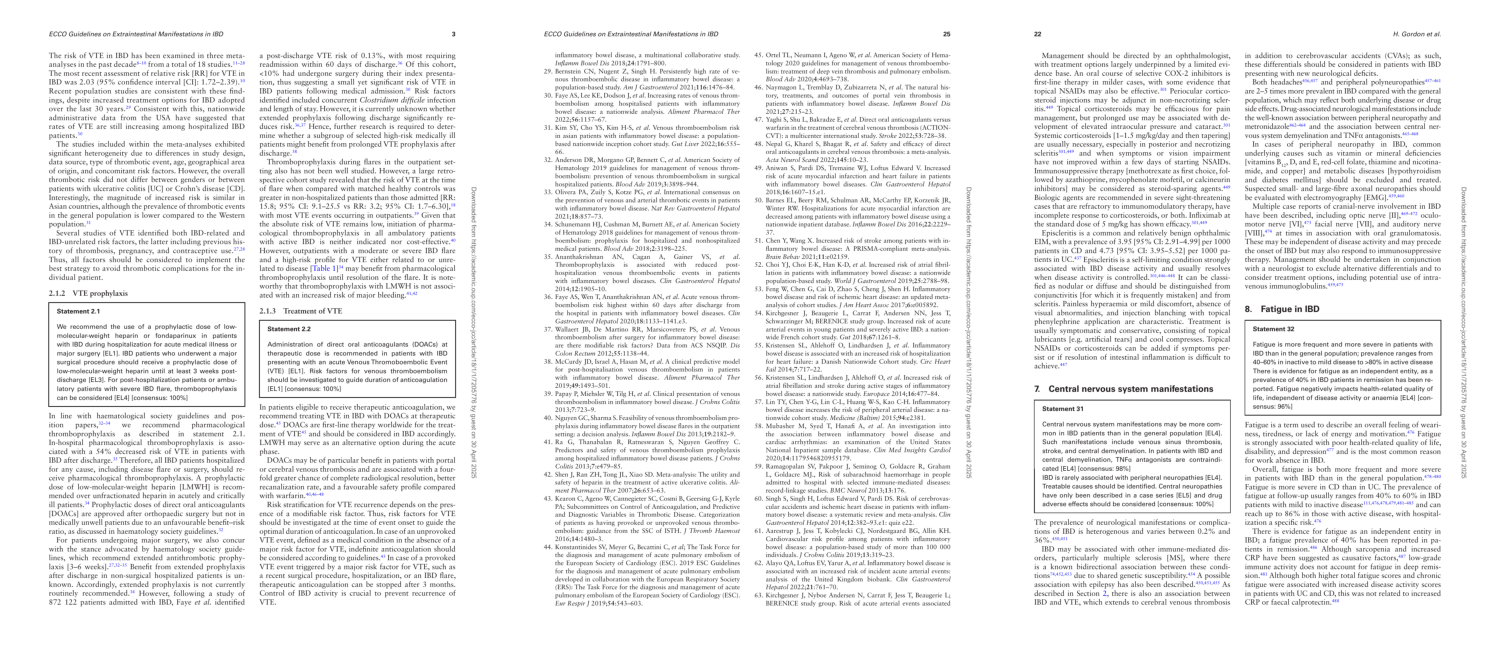

In [65]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 3, figsize=(15, 10))

for i, ax in enumerate(axes.flat):
    img = grouped_images[i]
    ax.imshow(img)
    ax.axis("off")

plt.tight_layout()
plt.show()

In [13]:
!pip install -U bitsandbytes accelerate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 MB 12.2 MB/s eta 0:00:00


In [15]:
pip install -U bitsandbytes

In [11]:
from transformers import Qwen2VLForConditionalGeneration, Qwen2VLProcessor, BitsAndBytesConfig
import torch

quant_config = BitsAndBytesConfig(
    load_in_4bit=True,
    bnb_4bit_compute_dtype=torch.float16,
    bnb_4bit_use_double_quant=True,
    bnb_4bit_quant_type="nf4"
)

model_id = "Qwen/Qwen2-VL-7B-Instruct"

processor = Qwen2VLProcessor.from_pretrained(model_id, trust_remote_code=True)
vl_model = Qwen2VLForConditionalGeneration.from_pretrained(
    model_id,
    quantization_config=quant_config,
    device_map="auto",
    trust_remote_code=True,
)

Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

model-00004-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00001-of-00005.safetensors:   0%|          | 0.00/3.90G [00:00<?, ?B/s]

model-00002-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

model-00003-of-00005.safetensors:   0%|          | 0.00/3.86G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/5 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/244 [00:00<?, ?B/s]

In [25]:
torch.cuda.empty_cache()

In [26]:
from qwen_vl_utils import process_vision_info

In [27]:
min_pixels = 224 * 224
max_pixels = 1024 * 1024
vl_model_processor = Qwen2VLProcessor.from_pretrained(
    "Qwen/Qwen2-VL-7B-Instruct", min_pixels=min_pixels, max_pixels=max_pixels
)

In [66]:
chat_template = [
    {
        "role": "system",
        "content": "You are a Gastroenterology assistant. Answer in detail with all the possible facts available in document and accurately based only on the provided images and question."
    },
    {
        "role": "user",
        "content": [
            {"type": "image", "image": grouped_images[0]},  # e.g. an endoscopy diagram or chart
            {"type": "text", "text": text_query}
        ]
    }
]


In [67]:
text = vl_model_processor.apply_chat_template(chat_template, tokenize=False, add_generation_prompt=True)

In [68]:
image_inputs, _ = process_vision_info(chat_template)
inputs = vl_model_processor(
    text=[text],
    images=image_inputs,
    padding=True,
    return_tensors="pt",
)
inputs = inputs.to("cuda")

In [69]:
generated_ids = vl_model.generate(**inputs, max_new_tokens=500)

In [70]:
generated_ids_trimmed = [out_ids[len(in_ids) :] for in_ids, out_ids in zip(inputs.input_ids, generated_ids)]
output_text = vl_model_processor.batch_decode(
    generated_ids_trimmed, skip_special_tokens=True, clean_up_tokenization_spaces=False
)

In [71]:
print(output_text[0])

The recommended VTE prophylaxis for hospitalized IBD patients is not specified in the given text. However, it is mentioned that the risk of VTE in IBD patients is increased, and the use of VTE prophylaxis is recommended to prevent deep vein thrombosis (DVT) and pulmonary embolism (PE). The text also mentions that the risk of VTE in IBD patients is not only due to the disease itself but also due to the use of certain medications, such as corticosteroids and immunomodulators. Therefore, it is important to consult with a healthcare provider to determine the appropriate VTE prophylaxis for each individual patient.
